In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
import matplotlib.pyplot as plt

In [3]:
matrix_load_0430 = np.loadtxt('Example_0430.csv', dtype=np.int, delimiter=",")

In [4]:
nRow, nCol = matrix_load_0430.shape
A_0430 = np.zeros((nRow+nCol, nRow+nCol))
A_0430[:nRow, nRow:] = matrix_load_0430[:,:]
A_0430[nRow:, :nRow] = matrix_load_0430.T[:,:]

In [5]:
matrix_load_0430.shape

(1344, 1344)

In [6]:
sumRow = np.sum(matrix_load_0430, axis=1)

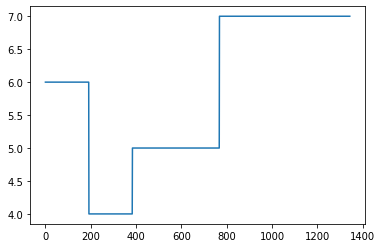

In [7]:
plt.plot(sumRow)#行和

In [8]:
len(sumRow[sumRow==6])

192

In [9]:
sumCol = np.sum(matrix_load_0430, axis=0)

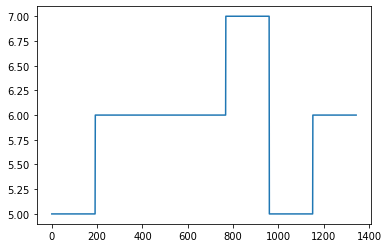

In [10]:
plt.plot(sumCol)

([<matplotlib.axis.YTick at 0x10d19efd0>,
 <a list of 7 Text yticklabel objects>)

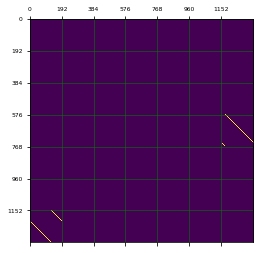

In [13]:
# Display matrix
plt.matshow(matrix_load_0430)
plt.grid(color='g', linestyle='-', linewidth=0.5)
xticks = np.arange(0, nCol, step=192)
yticks = np.arange(0, nRow, step=192)
plt.xticks(xticks,fontsize=3)
plt.yticks(yticks,fontsize=3)
# plt.savefig('A_0429.png', dpi=800)

In [14]:
def g2DiaGs(G, Row):
    DiaGs = [] # 线结构
    Gps = defaultdict(int) # 点的定位字典，在线结构的倒数第n个位置
    GCopy = copy.deepcopy(G)
    for xStart in range(Row): # 遍历部落一
        xAdj = GCopy[xStart] # xStart的好友列表
        for yStart in xAdj:
            step = 1 # 线长度2.0
            while yStart+step in GCopy[xStart+step]:
                GCopy[xStart+step].discard(yStart+step) # 移除点
                step += 1 # 满足条件, 线长度递增
            DiaGs.append([xStart, yStart, step]) # 保存斜线[起始X, 起始Y, 长度]
            for i in range(step):
                Gps[xStart+i, yStart+i] = step - i # 定位,最后一个点为1, 第一个点为step
                Gps[yStart+i, xStart+i] = step - i # 新增 便于检索定位
    DiaGs.sort(key=lambda x: (x[0],x[1])) # 按点位置排序
    return DiaGs, Gps

In [17]:
import numpy as np
from collections import defaultdict, Counter
import time
import copy

In [18]:
mLoad = np.loadtxt('Example_0430.csv', dtype=int, delimiter=',')
nRow, nCol = mLoad.shape
G0 = defaultdict(set)
for i in range(nRow):
    for j in range(nCol):
        if mLoad[i][j] == 1:
            # GLoad0[i].add(j)
            G0[i].add(j + nRow)
            G0[j + nRow].add(i)
DiaG0, Gps0 = g2DiaGs(G0, nRow)

In [19]:
keyPointsX = [Dia[0] for Dia in DiaG0]
keyPointsX = list(set(keyPointsX))
keyPointsX.sort()
keyPointsY = [Dia[1] for Dia in DiaG0]
keyPointsY = list(set(keyPointsY))
keyPointsY.sort()

In [26]:
for i in range(len(keyPointsY)):
    keyPointsY[i] -= nRow

keyPointsY

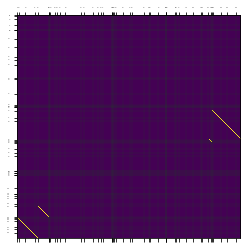

In [36]:
# Display matrix
plt.matshow(matrix_load_0430)
plt.grid(color='g', linestyle='-', linewidth=0.1)
plt.xticks(keyPointsY,fontsize=1)
plt.yticks(keyPointsX,fontsize=1)
plt.savefig('keyPoints.png', dpi=800)